In [1]:
from numpy.random import seed
seed(24)

In [2]:
# Data from Keras's bundled MNIST digits dataset
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
# Data exploration: dimensions
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


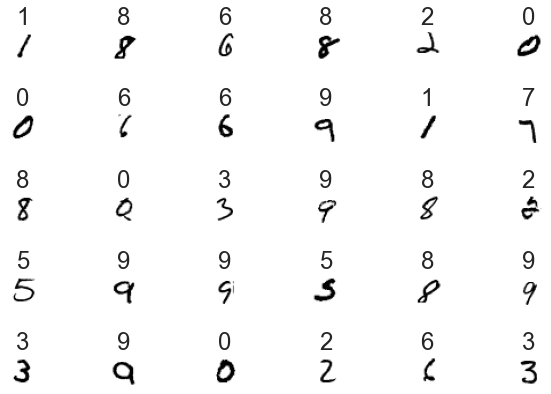

In [4]:
# Data exploration: visualize digits
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=2)

import numpy as np
idx = np.random.choice(np.arange(len(X_train)), 30, replace=False)
figure, axes = plt.subplots(nrows=5, ncols=6, figsize=(9, 6))

for item in zip(axes.ravel(), X_train[idx], y_train[idx]):
    axes, image, target = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])
    axes.set_yticks([])
    axes.set_title(target)
plt.tight_layout()

In [5]:
# Data preparation: reshaping
X_train = X_train.reshape((60000, 28, 28, 1))
print(X_train.shape)
X_test = X_test.reshape((10000, 28, 28, 1))
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [6]:
# Data preparation: normalization
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
print(y_train.shape)
print(y_train[0])
y_test = to_categorical(y_test)
print(y_test.shape)
print(y_test[0])

(60000, 10)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
(10000, 10)
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [7]:
# Create neural network
from tensorflow.keras.models import Sequential
cnn = Sequential()

In [8]:
# Add convolution layer to network
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D
cnn.add(Conv2D(filters=64, kernel_size=(3, 3), 
activation='relu', input_shape=(28, 28, 1))) # Rectified Linear Unit activation function

In [9]:
# Add pooling layer (reduces overfitting and computation time)
cnn.add(MaxPooling2D(pool_size=(2, 2)))

In [10]:
# Again (help model learn more relationships)
cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))

In [11]:
cnn.add(Flatten()) # From 5x5x128 to 1x3200

In [12]:
# Learn relationships among features
cnn.add(Dense(units=128, activation='relu'))
cnn.add(Dense(units=10, activation='softmax'))

In [13]:
# Visualize model's layers
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

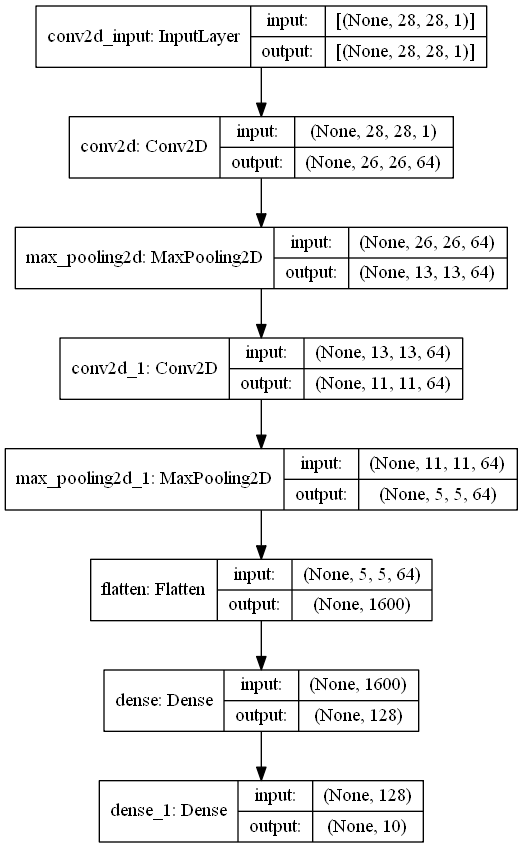

In [14]:
# Visualize model's structure
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(cnn, to_file='cnn.png', show_shapes=True, show_layer_names=True)
Image(filename='cnn.png')

In [15]:
# Compile model
cnn.compile(optimizer='adam', loss='categorical_crossentropy',
            metrics=['accuracy'])

In [16]:
# Visualize using TensorBoard
from tensorflow.keras.callbacks import TensorBoard
import time

tb_callback = TensorBoard(log_dir=f'./logs/mnist{time.time()}', 
histogram_freq=1, write_graph=True)

In [17]:
# Train model
cnn.fit(X_train, y_train, epochs=5, batch_size=64, 
validation_split=0.1, callbacks=[tb_callback])

Epoch 1/5
844/844 [==============================] - 51s 60ms/step - loss: 0.3763 - accuracy: 0.8845 - val_loss: 0.0449 - val_accuracy: 0.9863
Epoch 2/5
844/844 [==============================] - 57s 68ms/step - loss: 0.0490 - accuracy: 0.9845 - val_loss: 0.0337 - val_accuracy: 0.9902
Epoch 3/5
844/844 [==============================] - 55s 65ms/step - loss: 0.0316 - accuracy: 0.9902 - val_loss: 0.0346 - val_accuracy: 0.9902
Epoch 4/5
844/844 [==============================] - 50s 59ms/step - loss: 0.0208 - accuracy: 0.9937 - val_loss: 0.0344 - val_accuracy: 0.9902
Epoch 5/5
844/844 [==============================] - 46s 55ms/step - loss: 0.0152 - accuracy: 0.9943 - val_loss: 0.0283 - val_accuracy: 0.9918


In [18]:
# Evaluate model
loss, accuracy = cnn.evaluate(X_test, y_test)
print(loss)
print(accuracy)

313/313 [==============================] - 3s 9ms/step - loss: 0.0294 - accuracy: 0.9905
0.029432063922286034
0.9904999732971191


In [19]:
# Make predictions with model
predictions = cnn.predict(X_test)

print(y_test[24]) # Should be 4

for index, probability in enumerate(predictions[24]):
    print(f'{index}: {probability:.10%}')

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
0: 0.0000002580%
1: 0.0000917211%
2: 0.0005929505%
3: 0.0000008500%
4: 99.9986052513%
5: 0.0000014733%
6: 0.0000011118%
7: 0.0002599528%
8: 0.0000137375%
9: 0.0004275268%


95


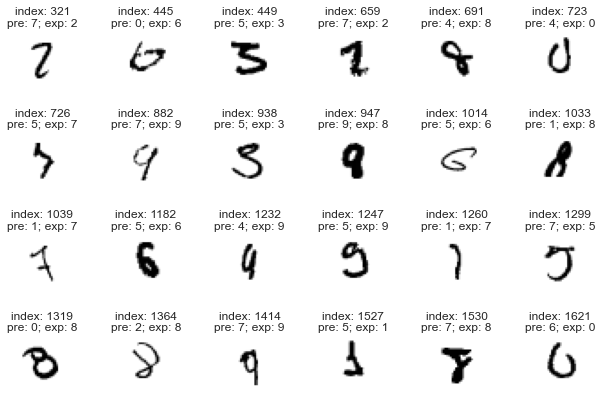

In [20]:
# Find and visualize incorrect predictions
images = X_test.reshape((10000, 28, 28))
incorrect = []

for i, (p, e) in enumerate(zip(predictions, y_test)):
    predicted, expected = np.argmax(p), np.argmax(e)
    if predicted != expected:
        incorrect.append((i, images[i], predicted, expected))

print(len(incorrect)) # Number of incorrect predictions

figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(9, 6))
for axes, item in zip(axes.ravel(), incorrect):
    index, image, predicted, expected = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])
    axes.set_yticks([])
    axes.set_title(f'index: {index}\npre: {predicted}; exp: {expected}', 
    size=12)
plt.tight_layout()

In [21]:
def show_incorrect(prediction):
    for index, probability in enumerate(prediction):
        print(f'{index}: {probability:.10%}')
show_incorrect(predictions[247])

0: 0.0000596823%
1: 0.0873362820%
2: 0.1822883030%
3: 0.0000012313%
4: 77.1996855736%
5: 0.0079690602%
6: 22.5171521306%
7: 0.0000105804%
8: 0.0055050343%
9: 0.0000011674%


In [22]:
cnn.save('mnist_digist_cnn.h5')